Try to add a simple calcium buffer to the existing compartment model.
Let the on-rate be $kon = 50e-3$ and the off-rate $koff = 250e-3$ for calcium binding to the buffer Troponin C (TnC).  assume the initial condition for the concentration of cTnC is $0.015\mu M$, and the initial condition for TnC (with no calcium bound) is $0.985 \mu M$. In other words, the total population of TnC, both bound and unbound to Ca$^{2+}$, is 1 $\mu M$. You should add an additional differential equation tracking the concentration of cTnC, and also adjust the dc/dt equation to reflect the buffering properties of TnC.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.integrate

from array import array
from pylab import *
from scipy.integrate.odepack import odeint

from scipy.integrate import odeint
from math import exp, log, sqrt, pi

#constants
k_1 = 2*10**(-5);
k_2 = 0.13;
k_4 = 0.9;
kappa_1 = 0.013;
kappa_2 = 0.58;
K_d = 0.5;
n = 3;
gamma = 4.17;
c0 = 1000;
kon = 50e-3
koff = 250e-3

params = (k_1, k_2, k_4, kappa_1, kappa_2, K_d, n, gamma, c0, kon, koff)


In [2]:
# Implement the right-hand-side of the system

def rhs(y, t, k_1, k_2, k_4, kappa_1, kappa_2, K_d, n, gamma, c0, kon, koff):
    c, cSR, cTnC = y

    #input
    c = y[0];
    cSR = y[1];

    #calculation of k_3
    k_3 = kappa_1 + (kappa_2*c**n)/(K_d**n+c**n)
    #calcium entry
    J_L1 = k_1 * (c0 - c)
    #calcium extrusion
    J_P1 = k_2 * c;
    #calcium release
    J_L2  = k_3 *(cSR - c);
    #calcium uptake
    J_P2 = k_4 *c;
    # buffer
    dcTnC_dt = kon*c*(1-cTnC) - koff*cTnC

    #caculate time dependent functions
    dc_dt =   J_L1-J_P1+J_L2-J_P2-dcTnC_dt
    dcSR_dt = gamma*(-J_L2+J_P2) 
    
    return [dc_dt, dcSR_dt, dcTnC_dt]



In [3]:
# Make a vector of time points where solutions are to be computed
time = np.linspace(0, 1000, 1000)

# Define the initial condition
y_0 = (0.0795, 4.1725, 0.015)


# Call the ODE solver
solutions = odeint(rhs, y_0, time, params)
c, cSR, cTnC = np.hsplit(solutions, 3)

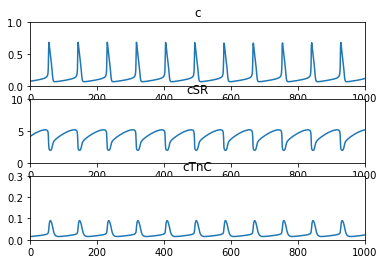

In [4]:
plt.subplot(3,1,1); plt.plot(time,c); plt.title('c')
plt.axis([0, 1000, 0, 1])
plt.subplot(3,1,2); plt.plot(time,cSR); plt.title('cSR')
plt.axis([0, 1000, 0, 10])
plt.subplot(3,1,3); plt.plot(time,cTnC); plt.title('cTnC')
plt.axis([0, 1000, 0, .3])
plt.show()


What happens when the on- and off-rate for calcium binding to TnC changes? Why?

In [5]:
from Buffer import CICR_Widget
CICR_Widget().display()

interactive(children=(FloatSlider(value=0.05, description='kon', max=0.1, min=0.025, step=0.001), FloatSlider(…